# Chapter 9. Unsupervised Learning (無監督學習)

Project Goal: 分群法(clustering), 異常檢測(anomaly detection), 密度估計(density estimation)

# Clustering (分群法)

找出相似的實例, 分到相似實例的群體或群聚(clusters)
* 與前面章節的分類法之差別在於, 分群法沒有標籤, 是無監督任務
* 兩種常見的分群演算法：K-Means, DBSCAN

# K-Means

原理：先隨機挑選k個質心, 幫實例加上標籤(離他最近的質心), 再計算出新的質心, 並重新分配標籤, 不斷反覆直到收斂(通常很快就會收斂！是最快的分群演算法之一)

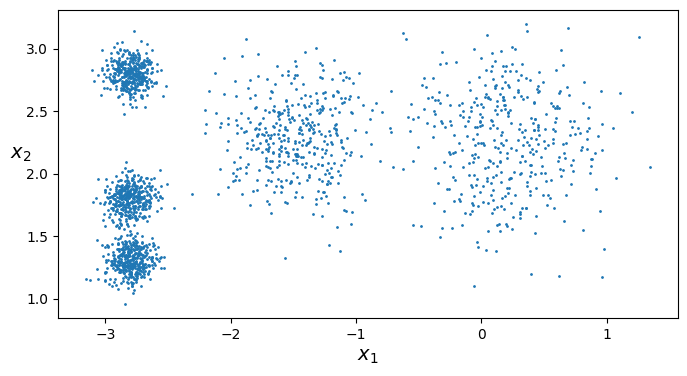

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 以下是我們的資料組
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [ ]:
# 假設我們預先知道了資料可以大致分成五群, 就設 k = 5
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

print("y_pred          =", y_pred)
print("kmeans.labels_  =", kmeans.labels_)
print("cluster centers =\n", kmeans.cluster_centers_)   # 群聚的質心
# 由結果可以看到, 因為是無監督學習(原先沒有標籤), 所以實例的標籤就會是我們預測出來的y_pred

y_pred          = [0 0 4 ... 3 1 0]
kmeans.labels_  = [0 0 4 ... 3 1 0]
cluster centers =
 [[-2.80214068  1.55162671]
 [ 0.08703534  2.58438091]
 [-1.46869323  2.28214236]
 [-2.79290307  2.79641063]
 [ 0.31332823  1.96822352]]


/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


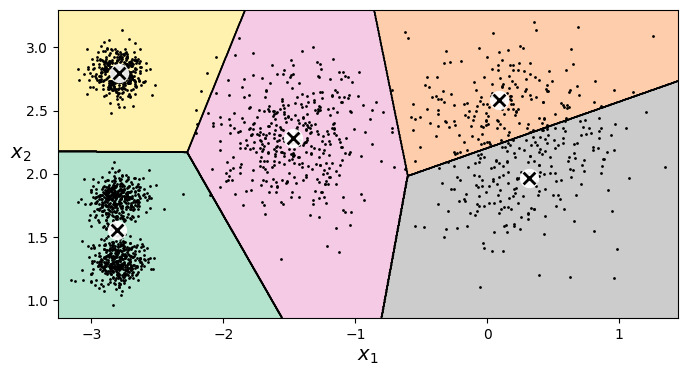

In [ ]:
# 畫出決策邊界
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

# 下圖結果中, X 代表各個質心
# 可以看到, 有些實例被錯誤分配了, 例如黃色與粉紅色交接處
# 事實上, K-Means在資料團直徑有很大不同時表線的不是很好, 因為它只在乎實例離質心多遠

In [ ]:
# 上述將每個實例分到單一群聚稱為 hard clustering
# 也可以改成得到實例屬於各個群聚的分數, 即為 soft clustering

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.transform(X_new))

# 結果顯示, [0, 2] 距離第一質心 2.83, 距離第二質心 0.59, 距離第三質心 1.49...
# np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

[[2.83778629 0.59082671 1.4955481  2.9042344  0.31493543]
 [5.81943941 2.9710039  4.47759126 5.84739223 2.68685968]
 [1.4618254  3.11488787 1.6912185  0.29040966 3.47026031]
 [0.96879317 3.08818836 1.54672634 0.36159148 3.35573094]]


/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


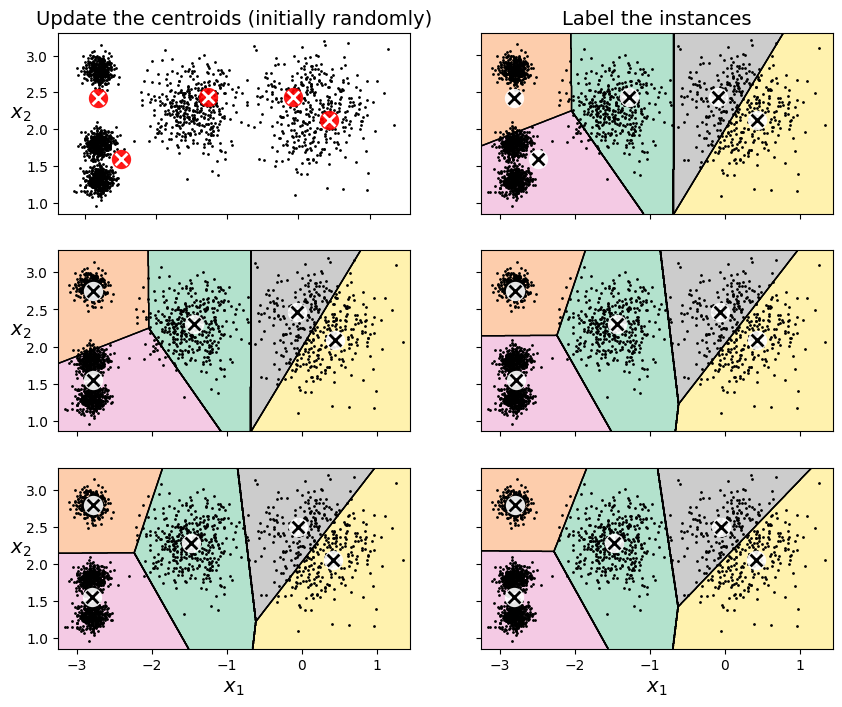

In [ ]:
# 圖示化來觀察 K-Means 的質心是如何收斂的

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

缺點：雖然保證收斂, 但不一定能收斂到正確解(取決於最初挑選的質心), 故 需要有更好的方法來挑選最一開始的質心！

In [ ]:
# 理論上, 最佳解會是 各個實例與最近質心的均方距離 最小的情況, 也就是 inertia
# 我們可以用不同的隨機初始質心先跑過多次, 再用 inertia 最低的那一組質心當作初始值來執行
# 只要將 KMeans() 的 n_init 設為 n, 就會自動保留 n 次執行中最好的結果了
# E.g. kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, algorithm="full") ......

print("inertia =", kmeans.inertia_)
X_dist = kmeans.transform(X)
print("Equal to: np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2) =", np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2))


inertia = 219.42800073647595
Equal to: np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2) = 219.4280007364755


# K-Means++

改善原先 K-Means 的初始步驟, 新的原理如下：
* 從資料組中均於地隨機選擇第一個質心 c1
* 以 "已經被選中且離他最近的質心之距離" 為機率選擇下一個質心 (也就是容易選到比已選過質心更遠的實例) 
* 重複, 直到選完 k 個質心
* 也就是說, K-Means++ 的初始質心之間距離會更遠, 比較不容易收斂到次佳的解

KMeans() 中的 init, default 就會是 K-Means++ 了, 除非特別設定 init='random' 才會隨機選擇 --> 所以不要設成 random !!

# Accelerated K-Means

利用三角不等式(連接兩點的直線一定是最短距離)以及追蹤實例與質心之間的上下界, 避免許多不必要的距離計算, 來大幅加速演算法 (KMeans()預設用的就是Accelerated K-Means演算法)

# Mini-Batch K-Means

每次迭代時只使用小批次資料稍微移動質心, 而不是每次都用整個資料集, 通常也可以加速演算法

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
print("inertia =", minibatch_kmeans.inertia_)

# 雖然 Mini-Batch K-Means 比一般的 K-Means 還快很多, 但 inertia 通常會稍微差一些

inertia = 211.65899374574312


/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Mini-Batch K-Means v.s. K-Means

100/100

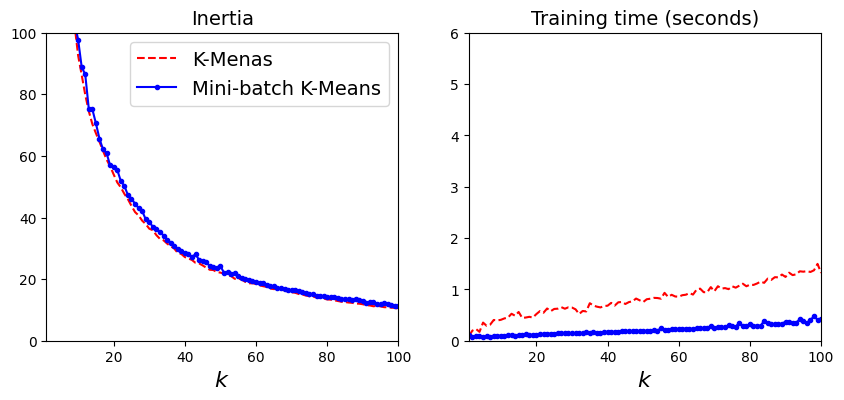

In [ ]:
from timeit import timeit
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Menas")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

# 由下圖可以看出, Mini-Batch 的 inertia 會略高一些, 但訓練速度會快很多

# 找出最佳的 Cluster 數

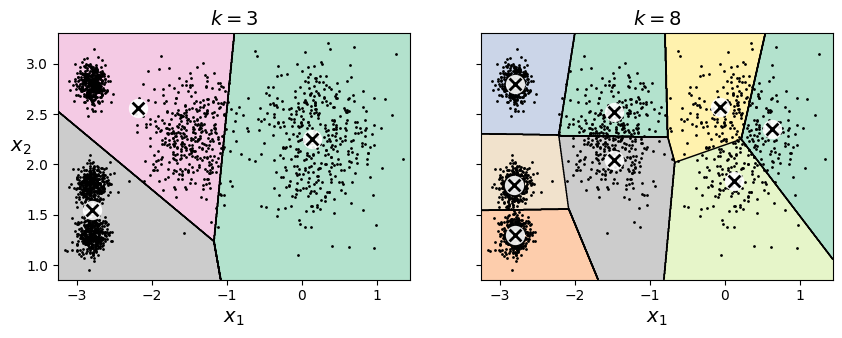

inertia of n_clusters=3 : 653.2167190021553
inertia of n_clusters=8 : 119.22484592677122


In [ ]:
# 如果 n_clusters 沒有挑好, 會變成下面這樣的結果

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

print("inertia of n_clusters=3 :", kmeans_k3.inertia_)
print("inertia of n_clusters=8 :", kmeans_k8.inertia_)

# 由下圖可見, n_clusters 是多少很重要！
# 而且 inertia 愈低, 不一定就代表模型的效果更好！ (n_clusters=5 時為 211.6)
# 因為 inertia 本來就會隨著群聚數增多而下降

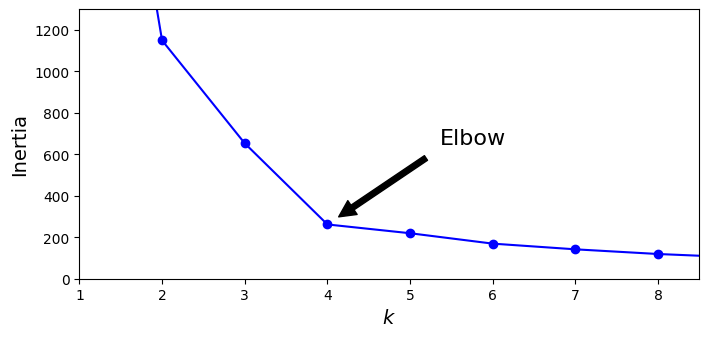

In [ ]:
# 以 inertia 與 n_clusters 的關係做圖時, 通常曲線都會有一個拐點, 稱為 "elbow"

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

# 如圖所示, 在 elbow 之前的區段, inertia 會快速下降
# 代表 elbow 處會是一個很好的 n_clusters 選擇
# 但這種方法非常的粗糙

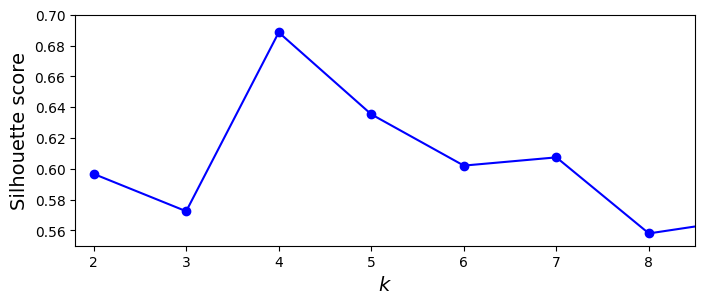

In [ ]:
# 更好的方法是利用 輪廓分數 (silhouette score), 也就是所有實例的平均輪廓係數
# 其中輪廓係數就是 (b - a)/max(a, b), 介於 1 ~ -1 之間
# 而a是他和同一群聚其他實例的平均距離, b是他和離他最近的其他群聚的平均距離
# 接近＋1代表實例在自己群聚中且離其他群聚很遠, 接近0代表在群聚邊界, 接近-1代表沒有被分到正確群聚中

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                                      for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

# 由結果可以看出, n_clusters=4 是很好的選擇, 其次是 5

輪廓圖(silhouette diagram):畫出每一個實例的輪廓係數, 並按照群聚及係數值排序

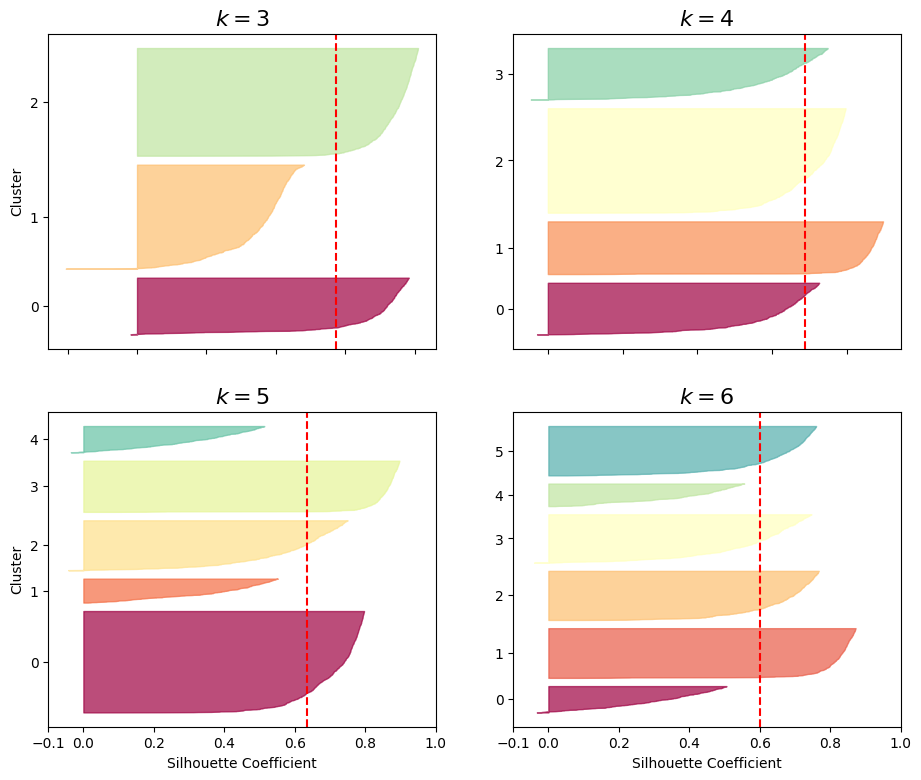

In [ ]:
# 在輪廓圖中, 刀形的高度是群聚的實例數, 寬度代表該群聚的實例已經排列的輪廓係數(愈寬愈好)
# 圖中虛線代表平均輪廓係數

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

# 在下圖中, 最好的選擇會是所有刀形都差不多寬, 且都超過虛線的情況
# 跟書中的結果不同, 這裡是4比較好, 但書中是5, 原因未知

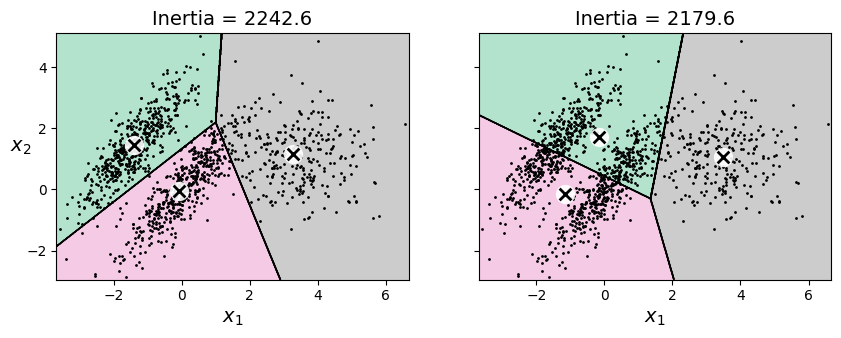

In [ ]:
# 但 K-Means 演算法也有很明顯的限制
# 例如 資料群聚大小不一致、有不同密度、形狀不是球形時, K-Means 的表現不會太好

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

# 由下圖可以看見, 在這種資料下, K-Means 的結果就都會很差

# Image Segmentation Using Clustering

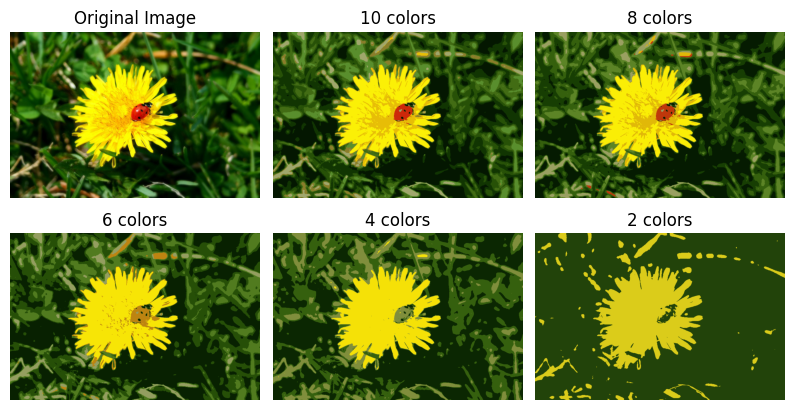

In [ ]:
# 利用 clustering 來進行顏色分割

import os
import urllib
from matplotlib.image import imread

# Download the ladybug image
images_path = os.path.join(".", "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

image = imread(os.path.join(images_path, filename))   # image.shape = (533, 800, 3)
X = image.reshape(-1, 3)                              # 攤平成 (426400, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]  # 相同群聚的聚在一起
segmented_img = segmented_img.reshape(image.shape)
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

# 注意下圖的紅色瓢蟲, 當群聚數量變小時, 紅色會因為遠小於照片其他部分而不能自己形成一個群聚
# 所以後來紅色會消失, 融入環境的顏色了

# Preprocessing Using Clustering

In [ ]:
# 以數字辨識為例

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
print("Original Score :", log_reg_score)

Original Score : 0.9688888888888889


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

pipeline_score = pipeline.score(X_test, y_test)
print("Score using clustering preprocessing :", pipeline_score)
print("The error rate drop :", 1-(1-pipeline_score)/(1-log_reg_score))

# 由結果可見, 先用 cluster 做 preprocessing, error rate 可以下降 14%

Score using clustering preprocessing : 0.9733333333333334
The error rate drop : 0.1428571428571439


In [ ]:
# 而 n_clusters 當然也可以調整(前面是隨便設成50)
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

print("Best parameter :", grid_clf.best_params_)
print("Score :", grid_clf.score(X_test, y_test))

# 由結果可見, 在 2~100 之間, n_clusters=98 時有最好的準確率 97.8%

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans_

# Semi-Supervised Learning Using Clustering

在"有許多無標籤實例及少量有標籤實例"的情況下(semi-supervised, 半監督學習), 也可以用分群法來優化

In [ ]:
# 以數字辨識為例, 一開始先看都沒有標籤的情況

n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
print("Original Score :", log_reg.score(X_test, y_test))

Original Score : 0.8333333333333334


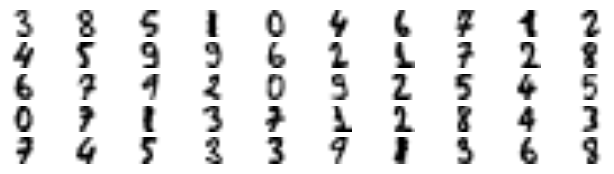

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

# 下圖中, 這50個數字就是最接近那50個群聚之質心的照片
# 這些就稱為 representative image (代表性圖片)

In [ ]:
# 手動幫這些代表性照片加上標籤, 也就是資料組裡面有50個有標籤的實例

y_representative_digits = np.array([
    3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 
    4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 
    6, 7, 9, 2, 0, 9, 2, 5, 4, 5, 
    0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 
    7, 4, 5, 3, 3, 9, 1, 3, 6, 8])

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
print("Score w/ 50 Labeled Instances :", log_reg.score(X_test, y_test))

# 由結果可見, 準確率馬上增加到 89.6%

Score w/ 50 Labeled Instances : 0.8955555555555555


In [ ]:
# 再加上 標籤傳播(label prepagation, 將標籤推廣到同一群聚的所有其他實例)

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
print("Score w/ 100 percent Label Propagation :", log_reg.score(X_test, y_test))

# 由結果可見, 當我們把所有群聚內的實例都賦予與質心相同的標籤時, 準確率會繼續上升
# 但其實我們應該不要把所有cluster內的實例都標籤, 因為有些 outlier 會不準確！

Score w/ 100 percent Label Propagation : 0.9288888888888889


In [ ]:
# 這次只把最接近質心的75%資料貼上標籤

percentile_closest = 75
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
print("Score w/ 75 percent Label Propagation :", log_reg.score(X_test, y_test))
print("Accuracy :", np.mean(y_train_partially_propagated == y_train[partially_propagated]))

# 理論上結果會上升, 但這裡下降了, 應該是隨機的緣故
# 但整體準確率達到了 96.2%, 很不錯！

Score w/ 75 percent Label Propagation : 0.9111111111111111
Accuracy : 0.9621136590229312


延伸: 主動學習(active learning), 讓人類與演算法互動, 當演算法詢問特定實例時, 提供他們的標籤
* 不確定性抽樣(uncertainty sampling): 用目前蒐集到的標籤做訓練, 並用這個模型對所有無標籤實例做預測, 人類再將模型估計正確率最低的實例加上標籤, 反覆這個程序
* 也可以將人為加上標籤的實例改成讓模型產生最大改變者、讓模型驗證誤差下降最多者、或是不同模型對其有不同看法的實例

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN在資料組的群聚足夠密集, 並且低密度區域清楚分隔時, 會有很好的表現, 原理如下: 
* 幫每個實例都計算出在一定距離ε(epsilon)之內有多少其他實例, 當數量超過 min_samples 時代表他位於密集區域, 把他視為 核實例(core instance)
* 核實例形成的群聚中也有可能會有其他核實例, 所以一連串的核實例也會組成一個大的核實例
* 如果某個實例他並不屬於任何群集, 則將他視為異常實例

In [ ]:
# 以 make_moons 資料做示範

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
# .labels_ 輸出結果代表屬於哪一個群聚, 而 -1 代表他被演算法視為異常實例
print("Labels :", dbscan.labels_[:10])
# .core_sample_indices_ 代表哪幾個是核實例
print("Indices of Core Samples :", dbscan.core_sample_indices_[:10])
# .components_ 存的就是核實例
print("Core Samples :\n", dbscan.components_[:3])

Labels : [ 0  2 -1 -1  1  0  0  0  2  5]
Indices of Core Samples : [ 0  4  5  6  7  8 10 11 12 13]
Core Samples :
 [[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]]


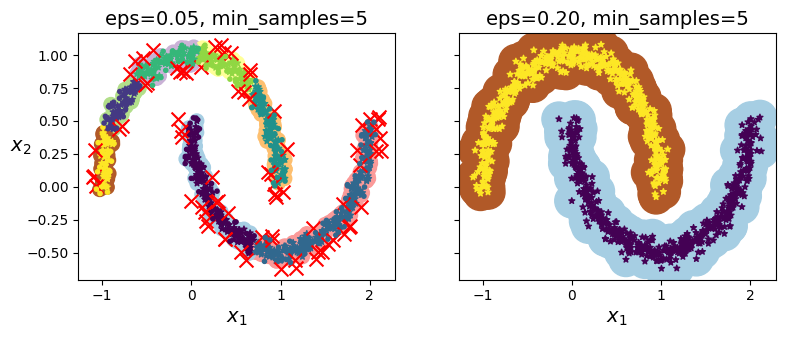

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    # np.zeros_like() 會 return 一個與給定大小一致的全0 numpy array
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()

# 由結果可以看出, 在 ε=0.05 時, 資料會被分成7個群集, 且會有非常多異常實例(紅色叉叉)
# 改成 ε=0.2 後, 因為離核的距離拉大, 所以可以成功分成兩群, 也減少了異常實例的數量

但是, DBSCAN 並沒有 .predict(), 也就是他無法預測新的實例屬於哪一個群集, 不過我們可以自己實現

Prediction  : [1 0 1 0]
Probability :
 [[0.18 0.82]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]]


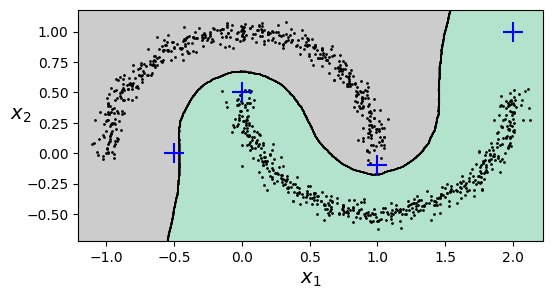

In [ ]:
# 用核實例來訓練 K-Neighbors Classifier, 讓他執行預測

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print("Prediction  :", knn.predict(X_new))
print("Probability :\n", knn.predict_proba(X_new))

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

# 下圖中的黑色曲線就是決策邊界, 四個十字就是四個新實例的位置及他們的預測

In [ ]:
# 上面的例子中因為沒有異常實例, 所以每一個新實例都會被預測到一個群聚, 而不會被視為異常實例
# 我們可以自訂異常實例的距離限度(例如 0.2), 來修正這個缺點

y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

# 由結果可見, (-0.5, 0) 及 (2, 1) 兩個實例就會被視為異常實例了

array([-1,  0,  1, -1])

# 其他分群演算法

Spectral Clustering (譜分群):
* 先把實例彼此之間的相似度做成矩陣
* 再降維成二維的子矩陣, 並在二維空間中使用其他的分群演算法(例如K-Means)
* 缺點: 無法妥善處理大量資料, 也不擅長處理尺寸差異很大的群聚

In [ ]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

/var/folders/kl/8jz9qp1s7j18_zz5yhcfm4yw0000gn/T/ipykernel_36752/938137748.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)


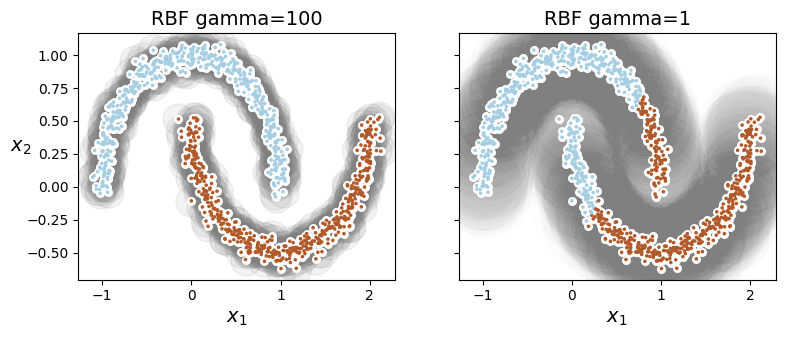

In [ ]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

Agglomerative Clustering:
* 每次迭代時, 將最靠近的一對群聚連起來, 並將所有合併的群聚畫成一棵群聚二元樹
* 易於擴展成大量的實例或群聚, 較靈活且資訊豐富

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

print("All Parameters :", learned_parameters(agg))
print("Children :\n", agg.children_)

All Parameters : ['children_', 'labels_', 'n_clusters_', 'n_connected_components_', 'n_features_in_', 'n_leaves_']
Children :
 [[0 1]
 [2 3]
 [4 5]]


# Gaussian Mixtures (高斯混合)

高斯混合模型是一種機率模型, 它假設實例都是一些參數未知的高斯分布混合物產生, 而單一高斯分布產生的所有實例通常會形成一個類似橢圓形的群聚, 每一個群聚都有不同的外型、大小、密度、方向 (原理超級難懂...詳見 p.254 ~ p.255)

In [ ]:
from sklearn.mixture import GaussianMixture

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

print("weights :", gm.weights_)
print("means :\n", gm.means_)
print("covariances :\n", gm.covariances_)
print("Is converged?", gm.converged_)
print("Iterations :", gm.n_iter_)

weights : [0.40005972 0.20961444 0.39032584]
means :
 [[-1.40764129  1.42712848]
 [ 3.39947665  1.05931088]
 [ 0.05145113  0.07534576]]
covariances :
 [[[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]

 [[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]

 [[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]]
Is converged? True
Iterations : 4


In [ ]:
# 高斯分布模型可以做應分配或軟分配, 取決於用 predict() 或是 predict_proba()
print("Predict() :", gm.predict(X))
print("Predict_proba() :", gm.predict_proba(X))

# 也可以估計模型在任何位置的密度, 也就是密度機率函數(PDF)取log
print("log(PDF) :\n", gm.score_samples(X))

Predict() : [2 2 0 ... 1 1 1]
Predict_proba() : [[6.76282339e-07 2.31833274e-02 9.76815996e-01]
 [6.74575575e-04 1.64110061e-02 9.82914418e-01]
 [9.99922764e-01 1.99781831e-06 7.52377580e-05]
 ...
 [2.12540639e-26 9.99999568e-01 4.31902443e-07]
 [1.45002917e-41 1.00000000e+00 5.20915318e-16]
 [7.93266114e-41 1.00000000e+00 2.30971331e-15]]
log(PDF) :
 [-2.60786904 -3.57094519 -3.3302143  ... -3.51359636 -4.39793229
 -3.80725953]


In [ ]:
# 因為高斯分佈是生成模型 (generative model), 所以可以從中抽樣出新的實例
X_new, y_new = gm.sample(6)
print("X_new:\n", X_new)
print("y_new:\n", y_new)

X_new:
 [[-2.32491052  1.04752548]
 [-1.16654983  1.62795173]
 [ 1.84860618  2.07374016]
 [ 3.98304484  1.49869936]
 [ 3.8163406   0.53038367]
 [ 0.38079484 -0.56239369]]
y_new:
 [0 0 1 1 1 2]


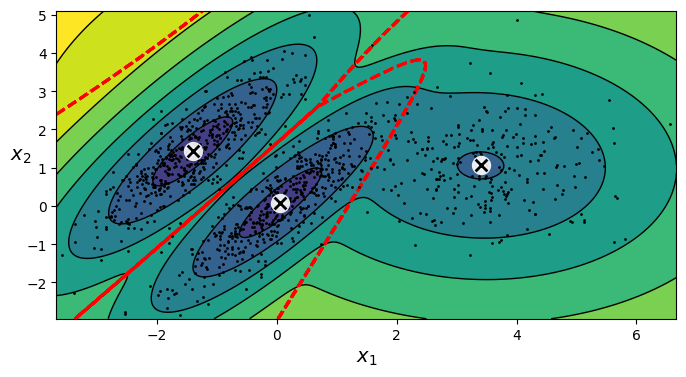

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors="r", linestyles='dashed')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

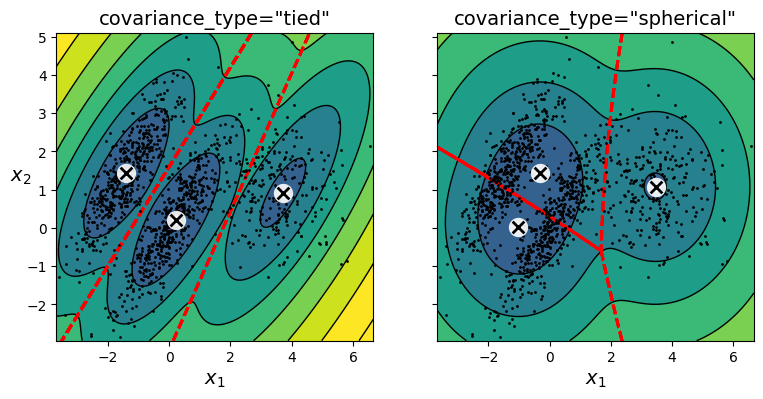

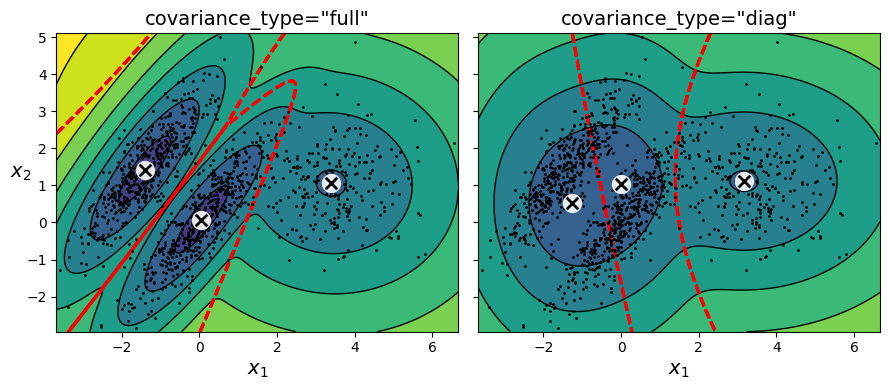

In [ ]:
# 也可以透過調整 covariance_type 來控制群聚的形狀及方向, 預設為 full (任意形狀大小方向)
# 例如: spherical 代表群聚都必須是球形, 但可以有不同的直徑(變異度)
# diag 代表群聚可以是任何大小的橢圓形, 但橢圓的軸必須與座標軸平行
# tied 代表所有群聚必須是同一種橢圓 (有相同大小與方向)

gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

利用高斯混合進行異常檢測

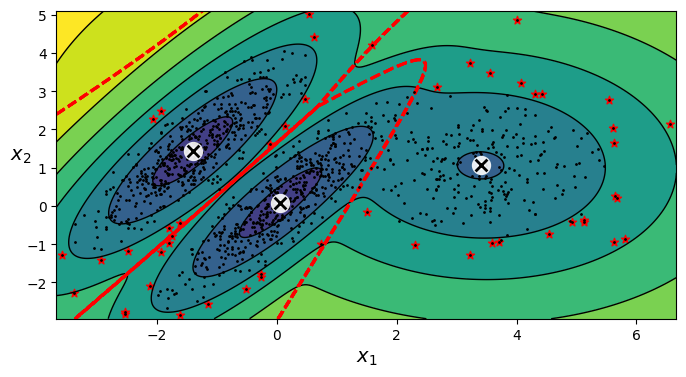

In [ ]:
# 原理上其實就是把在低密度區的實例視為異常, 而我們需要訂定密度閾值

densities = gm.score_samples(X)
# 假設把密度閾值定為 4%
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

# 下圖中標出來的就是在密度最低的那4%區域裡的離群值, 可以視為異常實例
# 新穎檢測(novelty detection): 就是以沒有離群值的資料組來進行訓練
# 故 可以用異常檢測先清理過資料組！就不會被離群值影響了

如何選擇群聚數量？

使用高斯混合時, 沒辦法像 K-Means 一樣透過inertia或輪廓分數來選擇適當群聚數量, 所以應該用 貝式資訊準則(Bayesian information criterion, BIC) 或 赤式資訊準則(Akaike, AIC)
* BIC = log(m) * p - 2 * log(L^)
* AIC = 2 * p - 2 * log(L^)
* m: 實例數; p: 參數數; L^: 模型概似函數(likelihood function)的最大值

In [ ]:
print("BIC :", gm.bic(X))
##############     BIC 也可以這樣算   ################
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
#####################################################

print("AIC :", gm.aic(X))

BIC : 8189.733705221636
AIC : 8102.508425106598


試試看 n_clusters 該挑多少才是最佳值？

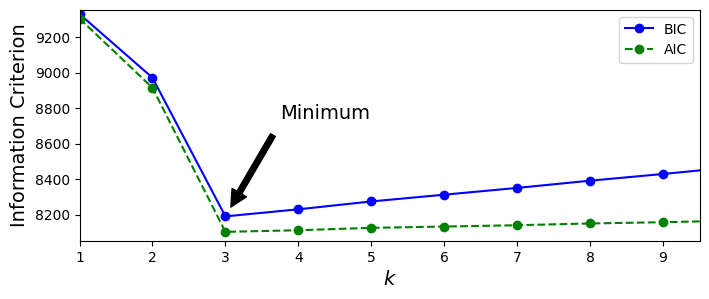

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

試試看 covariance_type 該挑什麼才是最佳值？

In [ ]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print("Best # of clusters :", best_k)
print("With covariance type :", best_covariance_type)

Best # of clusters : 3
With covariance type : full


# 貝式高斯混合模型 (BIC)

比起手動找尋最佳cluster數, 使用 BayesianGaussianMixture 類別會將沒必要的群聚之權重設為0。只要將n_components設為大於最佳cluster數的某個值, 演算法就會自動移除沒有必要的群聚了

[0.4  0.2  0.39 0.   0.   0.   0.   0.   0.   0.  ]


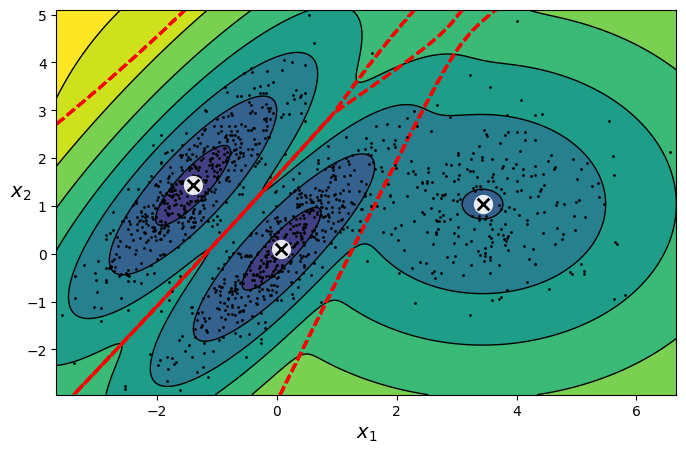

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
print(np.round(bgm.weights_, 2))
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()
# 由下面結果可見, 該演算法自動發現大概只需要3個群聚左右

(p. 264~267 這裡有提到一些較深入的東西, 有空可以看)

/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


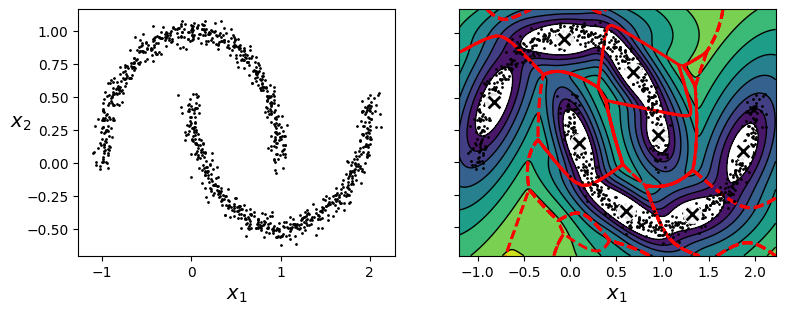

In [ ]:
# 高斯混合模型的缺點之一, 就是他比較適合用在橢圓形群聚上
# 如果是不同形狀的群聚可能沒那麼恰當, 例如 make_moons

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)
plt.show()

# 由下圖可見, 他會找到八個橢圓群聚, 而不是兩個半月型
# 但密度估計看起來不錯, 或許可以拿來做異常檢測

p. 268 還提供了一些其他的檢測演算法, 有空可以看看

# 概似函數 (Likelihood Function)

probability v.s. likelihood:
* probability: 知道參數θ的情況下, 未來出現x的可能性有多大
* likelihood: 知道結果是x的情況下, 參數θ為特定值的可能性有多大

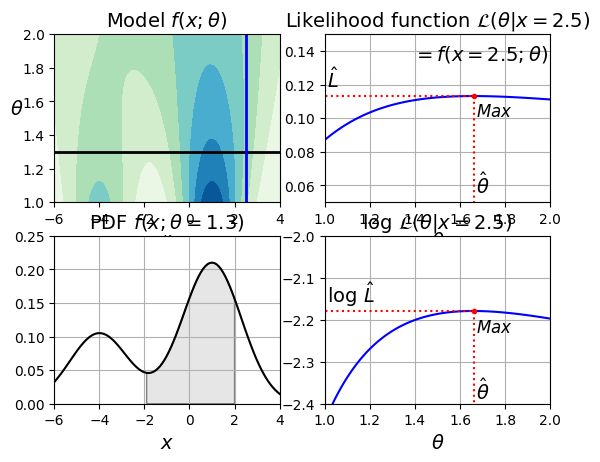

In [ ]:
# 假設有一個1D混合模型, 裡面有 中心位於-4 及 中心位於+1 的兩個高斯分佈
# 有另一個參數θ, 用來控制這兩個分布的標準差

from scipy.stats import norm
from matplotlib.patches import Polygon

xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:, np.newaxis] / (xx[1] - xx[0])

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.show()

# 左上：f(x, θ)的函數
# 左下: 左上圖取 θ=1.3 的截線時(黑線), 兩分布的pdf函數(機率密度)
#      若要估計 -2 <= x <= 2 的機率, 即是取灰色區域的積分
# 右上：左上圖取 x=2.5 的截線時(藍線), 兩分布的概似函數(x=2.5時θ為各種值的可能性)
# 右下：對數概似函數(右上取log)